# Location effects 
# Finding the absolute contrasts of the 26 effects using linear regression 

In [116]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 

In [68]:
data=pd.read_excel('Half Normal Plot for Orthogonal Comp Analysis_latest.xlsx')
data.head()

,Run,A,A_l,A_q,B,B_l,B_q,C,C_l,C_q,...,AB^2C_q,AB^2C^2,AB^2C^2_l,AB^2C^2_q,y_1,y_2,y_3,y_avg,s^2,ln s^2
0,1,0,-0.707107,0.408248,0,-0.707107,0.408248,0,-0.707107,0.408248,...,0.408248,0,-0.707107,0.408248,2.20,1.71,1.81,1.906667,0.067033,-2.702565
1,2,0,-0.707107,0.408248,0,-0.707107,0.408248,1,0.000000,-0.816497,...,-0.816497,2,0.707107,0.408248,1.80,1.84,1.98,1.873333,0.008933,-4.717966
2,3,0,-0.707107,0.408248,0,-0.707107,0.408248,2,0.707107,0.408248,...,0.408248,1,0.000000,-0.816497,2.43,2.29,2.11,2.276667,0.025733,-3.659968
3,4,0,-0.707107,0.408248,1,0.000000,-0.816497,0,-0.707107,0.408248,...,0.408248,2,0.707107,0.408248,1.88,2.13,2.00,2.003333,0.015633,-4.158350
4,5,0,-0.707107,0.408248,1,0.000000,-0.816497,1,0.000000,-0.816497,...,0.408248,1,0.000000,-0.816497,1.97,2.10,2.18,2.083333,0.011233,-4.488870


In [69]:
type(data)

pandas.core.frame.DataFrame

In [70]:
data.shape

(27, 46)

In [74]:
data.columns

Index(['Run', 'A', 'A_l', 'A_q', 'B', 'B_l', 'B_q', 'C', 'C_l', 'C_q', 'AB',
       'AB_l', 'AB_q', 'AB^2', 'AB^2_l', 'AB^2_q', 'AC', 'AC_l', 'AC_q',
       'AC^2', 'AC^2_l', 'AC^2_q', 'BC', 'BC_l', 'BC_q', 'BC^2', 'BC^2_l',
       'BC^2_q', 'ABC', 'ABC_l', 'ABC_q', 'ABC^2', 'ABC^2_l', 'ABC^2_q',
       'AB^2C', 'AB^2C_l', 'AB^2C_q', 'AB^2C^2', 'AB^2C^2_l', 'AB^2C^2_q',
       'y_1', 'y_2', 'y_3', 'y_avg', 's^2', 'ln s^2'],
      dtype='object')

In [75]:
X = data.drop(['Run','A','B','C','AB','BC','AC','AB^2','BC^2','AC^2','ABC','AB^2C','ABC^2','AB^2C^2','y_avg','s^2', 'ln s^2','y_1','y_2','y_3'], axis=1)

#data1= data.drop(['Run' ], axis=1, inplace= True)
#data1.head()

In [76]:
X.shape

(27, 26)

In [77]:
X= sm.add_constant(X)

In [78]:
X.columns

Index(['const', 'A_l', 'A_q', 'B_l', 'B_q', 'C_l', 'C_q', 'AB_l', 'AB_q',
       'AB^2_l', 'AB^2_q', 'AC_l', 'AC_q', 'AC^2_l', 'AC^2_q', 'BC_l', 'BC_q',
       'BC^2_l', 'BC^2_q', 'ABC_l', 'ABC_q', 'ABC^2_l', 'ABC^2_q', 'AB^2C_l',
       'AB^2C_q', 'AB^2C^2_l', 'AB^2C^2_q'],
      dtype='object')

In [79]:
Y= data['y_avg']
Y

0     1.906667
1     1.873333
2     2.276667
3     2.003333
4     2.083333
5     2.013333
6     1.936667
7     1.980000
8     1.893333
9     2.096667
10    2.266667
11    2.066667
12    2.090000
13    1.996667
14    1.983333
15    2.096667
16    2.113333
17    2.196667
18    2.320000
19    2.623333
20    2.053333
21    2.436667
22    2.413333
23    2.263333
24    2.340000
25    2.353333
26    2.203333
Name: y_avg, dtype: float64

In [80]:
model= sm.OLS(Y,X).fit()

In [81]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                nan
Time:                        02:18:10   Log-Likelihood:                 902.68
No. Observations:                  27   AIC:                            -1751.
Df Residuals:                       0   BIC:                            -1716.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1437        inf          0        n

/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [108]:
coefficients = model.params
parameters = model.params.index.tolist()  # Convert to list

In [109]:
# Take the modulus of the coefficients
coefficients_abs = np.abs(coefficients)

In [110]:
# Zip the coefficients with their corresponding parameters
coefficients_zipped = list(zip(parameters, coefficients_abs))  # Convert to list

In [112]:
# Convert zipped coefficients to DataFrame
df = pd.DataFrame(coefficients_zipped, columns=['Parameter', 'Absolute Coefficient'])
df.head()

,Parameter,Absolute Coefficient
0,const,2.143704
1,A_l,0.238845
2,A_q,0.052619
3,B_l,0.029070
4,B_q,0.001361


In [118]:
# Sort the DataFrame by the absolute coefficients
df_sorted = df.sort_values(by='Absolute Coefficient')
df_sorted = df_sorted[df_sorted['Parameter'] != 'const']

In [119]:
# Print the sorted DataFrame
print("Sorted Coefficients (DataFrame):")
print(df_sorted)

Sorted Coefficients (DataFrame):
    Parameter  Absolute Coefficient
4         B_q              0.001361
21    ABC^2_l              0.003405
10     AB^2_q              0.008165
18     BC^2_q              0.010887
23    AB^2C_l              0.012833
11       AC_l              0.013618
8        AB_q              0.018144
15       BC_l              0.018332
5         C_l              0.021737
17     BC^2_l              0.022523
3         B_l              0.029070
25  AB^2C^2_l              0.030903
19      ABC_l              0.036403
9      AB^2_l              0.037712
16       BC_q              0.039918
13     AC^2_l              0.042165
24    AB^2C_q              0.045815
2         A_q              0.052619
7        AB_l              0.054997
6         C_q              0.055794
26  AB^2C^2_q              0.062598
22    ABC^2_q              0.065773
20      ABC_q              0.071217
12       AC_q              0.075299
14     AC^2_q              0.076660
1         A_l              0.23

In [162]:
df_sorted= df_sorted.reset_index(drop=True)
df_sorted.head()

,Parameter,Absolute Coefficient,Quantiles
0,B_q,0.001361,0.024105
1,ABC^2_l,0.003405,0.072370
2,AB^2_q,0.008165,0.120804
3,BC^2_q,0.010887,0.169524
4,AB^2C_l,0.012833,0.218650


In [163]:
i_values= range(1,27)
len(i_values)

26

In [164]:
# Compute CDF values for standard normal distribution 
quantiles= [stats.norm.ppf(0.5+0.5*(i-0.5)/26) for i in i_values]
print (len(quantiles))

26


In [165]:
print(quantiles)

[0.0241045289806029, 0.07236970645650208, 0.12080416150268287, 0.16952384856926506, 0.21864951704140353, 0.2683089229162129, 0.31863936396437514, 0.36979067802381926, 0.42192888874856543, 0.4752407505132449, 0.5299395463003201, 0.5862726494026449, 0.6445316061066133, 0.7050658929000242, 0.7683021589798122, 0.8347718934067764, 0.9051524750285038, 0.9803303522249296, 1.0615026297045762, 1.1503493803760079, 1.2493462419630998, 1.3623833894180186, 1.496146876216362, 1.663792785885074, 1.8980286526220012, 2.3410271376304492]


In [166]:
type(quantiles)

list

In [173]:
# Adding the list to the dataframe
df_sorted['Quantiles']= quantiles
df_sorted.head()
df_sorted

,Parameter,Absolute Coefficient,Quantiles
0,B_q,0.001361,0.024105
1,ABC^2_l,0.003405,0.072370
2,AB^2_q,0.008165,0.120804
3,BC^2_q,0.010887,0.169524
4,AB^2C_l,0.012833,0.218650
5,AC_l,0.013618,0.268309
6,AB_q,0.018144,0.318639
7,BC_l,0.018332,0.369791
8,C_l,0.021737,0.421929
9,BC^2_l,0.022523,0.475241


In [168]:
labels= df_sorted['Parameter']
type(labels)

pandas.core.series.Series

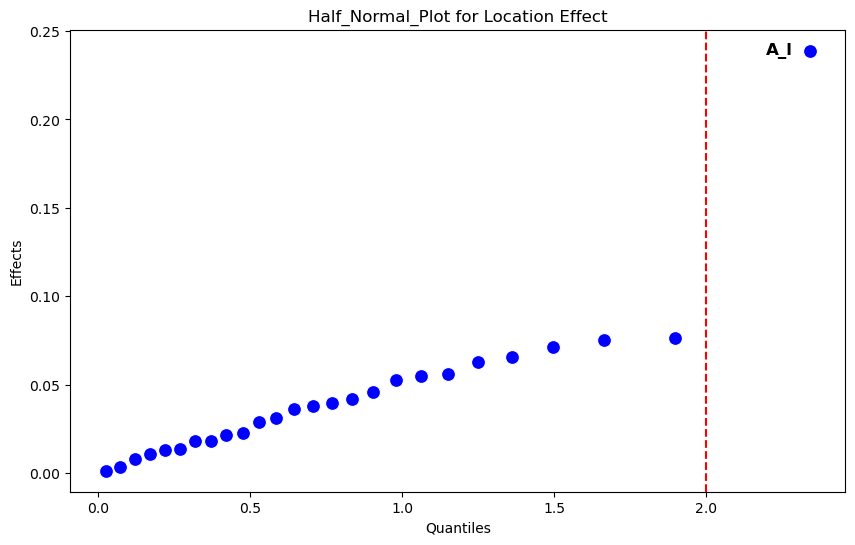

In [210]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted, x='Quantiles', y='Absolute Coefficient', color='blue', s=100)
plt.axvline(x=2.0, color='red', linestyle='--') 
#for i in range(len(df_sorted)):
    #plt.annotate(text[i], (x[i], y[i] + 0.2))
    #plt.annotate(df_sorted['Quantiles'][i], (df['Absolute Coefficient'][i], df['Parameter'][i]), fontsize=6, ha='center')
plt.text(2.241027,0.238845,"A_l",fontsize=12, ha='center', va='center', color='black', weight='bold') 
plt.title('Half_Normal_Plot for Location Effect')
plt.xlabel('Quantiles')
plt.ylabel('Effects')
plt.show()

In [ ]:
# From the half normal plot above, we get only one significant effect : A_l

In [ ]:
# Run the regression on A_l to get the Y_bar ( Location effect/ Flight Time )

In [211]:
X.columns

Index(['const', 'A_l', 'A_q', 'B_l', 'B_q', 'C_l', 'C_q', 'AB_l', 'AB_q',
       'AB^2_l', 'AB^2_q', 'AC_l', 'AC_q', 'AC^2_l', 'AC^2_q', 'BC_l', 'BC_q',
       'BC^2_l', 'BC^2_q', 'ABC_l', 'ABC_q', 'ABC^2_l', 'ABC^2_q', 'AB^2C_l',
       'AB^2C_q', 'AB^2C^2_l', 'AB^2C^2_q'],
      dtype='object')

In [214]:
X2=X['A_l']

In [215]:
X2= sm.add_constant(X2)

In [216]:
model_updated= sm.OLS(Y,X2).fit()
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_avg   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     31.02
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           8.61e-06
Time:                        14:54:10   Log-Likelihood:                 18.094
No. Observations:                  27   AIC:                            -32.19
Df Residuals:                      25   BIC:                            -29.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1437      0.025     86.578      0.0

In [ ]:
# From above results we can get the maximum flight time by selecting A_l as positive ; Y_bar= 2.1437 + 0.2388*A_l
# Replace A_l with +1 

# Dispersion Effects
# Finding the absolute contrasts of the 26 effects using linear regression 

In [218]:
X1 = data.drop(['Run','A','B','C','AB','BC','AC','AB^2','BC^2','AC^2','ABC','AB^2C','ABC^2','AB^2C^2','y_avg','s^2', 'ln s^2','y_1','y_2','y_3'], axis=1)

#data1= data.drop(['Run' ], axis=1, inplace= True)
#data1.head()

In [219]:
X1.columns

Index(['A_l', 'A_q', 'B_l', 'B_q', 'C_l', 'C_q', 'AB_l', 'AB_q', 'AB^2_l',
       'AB^2_q', 'AC_l', 'AC_q', 'AC^2_l', 'AC^2_q', 'BC_l', 'BC_q', 'BC^2_l',
       'BC^2_q', 'ABC_l', 'ABC_q', 'ABC^2_l', 'ABC^2_q', 'AB^2C_l', 'AB^2C_q',
       'AB^2C^2_l', 'AB^2C^2_q'],
      dtype='object')

In [220]:
X.columns

Index(['const', 'A_l', 'A_q', 'B_l', 'B_q', 'C_l', 'C_q', 'AB_l', 'AB_q',
       'AB^2_l', 'AB^2_q', 'AC_l', 'AC_q', 'AC^2_l', 'AC^2_q', 'BC_l', 'BC_q',
       'BC^2_l', 'BC^2_q', 'ABC_l', 'ABC_q', 'ABC^2_l', 'ABC^2_q', 'AB^2C_l',
       'AB^2C_q', 'AB^2C^2_l', 'AB^2C^2_q'],
      dtype='object')

In [184]:
Y1= data['ln s^2']
Y1

0    -2.702565
1    -4.717966
2    -3.659968
3    -4.158350
4    -4.488870
5    -3.374555
6    -4.126868
7    -5.067206
8    -3.905378
9    -3.518855
10   -5.311740
11   -3.328877
12   -3.717279
13   -3.982803
14   -4.078471
15   -6.547753
16   -5.046262
17   -4.957095
18   -5.776353
19   -4.632199
20   -3.245904
21   -4.126868
22   -4.310016
23   -3.852183
24   -3.952845
25   -4.957095
26   -3.788332
Name: ln s^2, dtype: float64

In [185]:
model_dispersion= sm.OLS(Y1,X).fit()

In [186]:
print(model_dispersion.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln s^2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                nan
Time:                        16:43:00   Log-Likelihood:                 889.25
No. Observations:                  27   AIC:                            -1725.
Df Residuals:                       0   BIC:                            -1690.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2716        inf         -0        n

/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/sushantkumar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [187]:
coefficients_disp = model_dispersion.params
parameters_dis = model_dispersion.params.index.tolist()  # Convert to list

In [188]:
# Take the modulus of the coefficients
dis_coefficients_abs = np.abs(coefficients_disp)

In [189]:
# Zip the coefficients with their corresponding parameters
dis_coefficients_zipped = list(zip(parameters_dis, dis_coefficients_abs))  # Convert to list

In [190]:
# Convert zipped coefficients to DataFrame
df_disp = pd.DataFrame(dis_coefficients_zipped, columns=['Parameter', 'Absolute_Coefficient'])
df_disp.head()

,Parameter,Absolute_Coefficient
0,const,4.271580
1,A_l,0.191710
2,A_q,0.278278
3,B_l,0.428538
4,B_q,0.320451


In [191]:
# Sort the DataFrame by the absolute coefficients
df_sorted_disp = df_disp.sort_values(by='Absolute_Coefficient')
df_sorted_disp = df_sorted_disp[df_sorted_disp['Parameter'] != 'const']

In [192]:
# Print the sorted DataFrame
print("Sorted Coefficients (DataFrame):")
print(df_sorted_disp)

Sorted Coefficients (DataFrame):
    Parameter  Absolute_Coefficient
14     AC^2_q              0.024342
15       BC_l              0.057326
12       AC_q              0.068059
22    ABC^2_q              0.090184
21    ABC^2_l              0.092563
7        AB_l              0.109068
16       BC_q              0.118526
10     AB^2_q              0.121961
26  AB^2C^2_q              0.133024
11       AC_l              0.148118
18     BC^2_q              0.154646
1         A_l              0.191710
24    AB^2C_q              0.195443
20      ABC_q              0.205508
8        AB_q              0.212929
17     BC^2_l              0.248612
19      ABC_l              0.258981
2         A_q              0.278278
4         B_q              0.320451
13     AC^2_l              0.336233
5         C_l              0.348601
25  AB^2C^2_l              0.360432
3         B_l              0.428538
9      AB^2_l              0.524046
6         C_q              0.553848
23    AB^2C_l              0.55

In [193]:
df_sorted_disp= df_sorted_disp.reset_index(drop=True)
df_sorted_disp.head()

,Parameter,Absolute_Coefficient
0,AC^2_q,0.024342
1,BC_l,0.057326
2,AC_q,0.068059
3,ABC^2_q,0.090184
4,ABC^2_l,0.092563


In [194]:
i_values_disp= range(1,27)
len(i_values_disp)

26

In [195]:
# Compute CDF values for standard normal distribution 
quantiles_disp= [stats.norm.ppf(0.5+0.5*(i-0.5)/26) for i in i_values_disp]
print (len(quantiles_disp))

26


In [196]:
# Adding the list to the dataframe
df_sorted_disp['Quantiles_disp']= quantiles_disp
df_sorted_disp.head()
df_sorted_disp

,Parameter,Absolute_Coefficient,Quantiles_disp
0,AC^2_q,0.024342,0.024105
1,BC_l,0.057326,0.072370
2,AC_q,0.068059,0.120804
3,ABC^2_q,0.090184,0.169524
4,ABC^2_l,0.092563,0.218650
5,AB_l,0.109068,0.268309
6,BC_q,0.118526,0.318639
7,AB^2_q,0.121961,0.369791
8,AB^2C^2_q,0.133024,0.421929
9,AC_l,0.148118,0.475241


In [197]:
labels= df_sorted_disp['Parameter']
type(labels)

pandas.core.series.Series

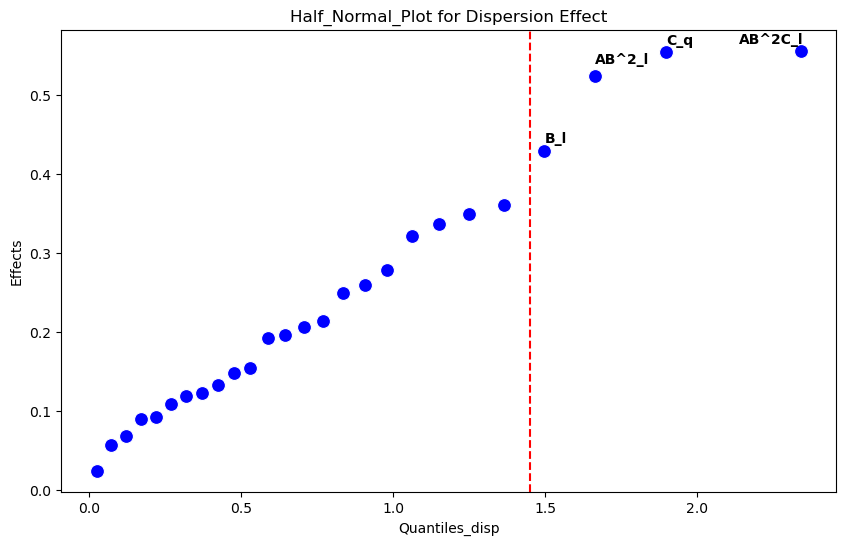

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted_disp, x='Quantiles_disp', y='Absolute_Coefficient', color='blue', s=100)
# Plot vertical line at the percentile
plt.axvline(x=1.45, color='red', linestyle='--') #label=f'{percentile}th Percentile'
#for i in range(len(df_sorted)):
    #plt.annotate(text[i], (x[i], y[i] + 0.2))
    #plt.annotate(df_sorted['Quantiles'][i], (df['Absolute Coefficient'][i], df['Parameter'][i]), fontsize=6, ha='center')
plt.text(2.241027,0.57,"AB^2C_l",fontsize=10, ha='center', va='center', color='black', weight='bold')
plt.text(1.898029, 0.563848, "C_q", color='black', weight='bold')
plt.text(1.663793, 0.54, "AB^2_l", color='black', weight='bold')
plt.text(1.496147,0.44, "B_l", color='black', weight='bold' )
plt.title('Half_Normal_Plot for Dispersion Effect')
plt.xlabel('Quantiles_disp')
plt.ylabel('Effects')
plt.show()

In [ ]:
# Choosing the red line as the threshold and all the effects on the right side of red line are significant. There 
# four effects are significant- AB^2C_l, C_q,AB^2_l, B_l 

In [ ]:
# Run a new regression with the significant effects and choose the levels of the factors 

In [223]:
type(X)

pandas.core.frame.DataFrame

In [234]:
X3=X[['B_l', 'AB^2_l','C_q','AB^2C_l']]
X3.shape

(27, 4)

In [239]:
data.head()

,Run,A,A_l,A_q,B,B_l,B_q,C,C_l,C_q,...,AB^2C_q,AB^2C^2,AB^2C^2_l,AB^2C^2_q,y_1,y_2,y_3,y_avg,s^2,ln s^2
0,1,0,-0.707107,0.408248,0,-0.707107,0.408248,0,-0.707107,0.408248,...,0.408248,0,-0.707107,0.408248,2.20,1.71,1.81,1.906667,0.067033,-2.702565
1,2,0,-0.707107,0.408248,0,-0.707107,0.408248,1,0.000000,-0.816497,...,-0.816497,2,0.707107,0.408248,1.80,1.84,1.98,1.873333,0.008933,-4.717966
2,3,0,-0.707107,0.408248,0,-0.707107,0.408248,2,0.707107,0.408248,...,0.408248,1,0.000000,-0.816497,2.43,2.29,2.11,2.276667,0.025733,-3.659968
3,4,0,-0.707107,0.408248,1,0.000000,-0.816497,0,-0.707107,0.408248,...,0.408248,2,0.707107,0.408248,1.88,2.13,2.00,2.003333,0.015633,-4.158350
4,5,0,-0.707107,0.408248,1,0.000000,-0.816497,1,0.000000,-0.816497,...,0.408248,1,0.000000,-0.816497,1.97,2.10,2.18,2.083333,0.011233,-4.488870


In [240]:
X3= sm.add_constant(X3)

In [241]:
Dispersion_model_updated= sm.OLS(Y1,X3).fit()

In [242]:
Y1

0    -2.702565
1    -4.717966
2    -3.659968
3    -4.158350
4    -4.488870
5    -3.374555
6    -4.126868
7    -5.067206
8    -3.905378
9    -3.518855
10   -5.311740
11   -3.328877
12   -3.717279
13   -3.982803
14   -4.078471
15   -6.547753
16   -5.046262
17   -4.957095
18   -5.776353
19   -4.632199
20   -3.245904
21   -4.126868
22   -4.310016
23   -3.852183
24   -3.952845
25   -4.957095
26   -3.788332
Name: ln s^2, dtype: float64

In [243]:
print(Dispersion_model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln s^2   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     6.116
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00182
Time:                        15:27:20   Log-Likelihood:                -23.007
No. Observations:                  27   AIC:                             56.01
Df Residuals:                      22   BIC:                             62.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2716      0.121    -35.315      0.0

In [ ]:
# From the above regression , we get the coefficients and hence the regression equation is as follows 

# To minimmise the dispersion, we can choose B_l as positive , AB^2_l as positive , C_q as negative and AB^2C_l as positive 
# The three levels for linear are  1/Root 2 (-1,0,1)
# The three levels for quadratic are 1/root(6) (1,-2,1)

In [ ]:
# As AB^2_l is aliased with the main effect E, hence by the rule of effect heirarchy principle, AB^2_l is replaced 
# by E. 
# There the regression equation becomes 
# ln s^2 = -4.2716 - 0.4285* B_l -0.5250 * AB^2_l +0.5538 * C_q -0.5556 * E  